In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 3-х шарова та 200 епох
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# компіляція та навчання нейронної мережі
model_1.compile(optimizer='adam', loss='mae', metrics=['mae'])
history_1 = model_1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

#оцінка моделі
train_loss = model_1.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model_1.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 44.7455 - mae: 44.7455 - val_loss: 43.2739 - val_mae: 43.2739
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 44.1496 - mae: 44.1496 - val_loss: 42.5335 - val_mae: 42.5335
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 43.1309 - mae: 43.1309 - val_loss: 41.2360 - val_mae: 41.2360
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 41.3879 - mae: 41.3879 - val_loss: 39.0028 - val_mae: 39.0028
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 38.4692 - mae: 38.4692 - val_loss: 35.4188 - val_mae: 35.4188
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 33.9704 - mae: 33.9704 - val_loss: 30.2516 - val_mae: 30.2516
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 27.7811 - mae: 27.7811 - val_loss: 23.6841 - val_mae: 23.6841
Epoch 8/200
25/25 [==============================] - 0

In [14]:
# 4-х шарова та 300 епох
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# компіляція та навчання нейронної мережі
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
history_2 = model_2.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# оцінка моделі
train_loss = model_2.evaluate(X_train, y_train, verbose=0)
print("Training Loss (MAE)", train_loss)
test_loss = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE)", test_loss)

Epoch 1/300
25/25 [==============================] - 1s 10ms/step - loss: 28.4366 - mae: 28.4366 - val_loss: 15.2465 - val_mae: 15.2465
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 13.5977 - mae: 13.5977 - val_loss: 14.7767 - val_mae: 14.7767
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 13.6110 - mae: 13.6110 - val_loss: 13.9287 - val_mae: 13.9287
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 13.2271 - mae: 13.2271 - val_loss: 13.1128 - val_mae: 13.1128
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 12.7307 - mae: 12.7307 - val_loss: 13.9826 - val_mae: 13.9826
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 12.6843 - mae: 12.6843 - val_loss: 13.1770 - val_mae: 13.1770
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 12.8029 - mae: 12.8029 - val_loss: 13.4018 - val_mae: 13.4018
Epoch 8/300
25/25 [==============================] - 0

In [15]:
print( " model_1", model_1.evaluate(X_test, y_test, verbose=0)[1], "\n", "model_2", model_2.evaluate(X_test, y_test, verbose=0)[1])

 model_1 12.886469841003418 
 model_2 16.915040969848633


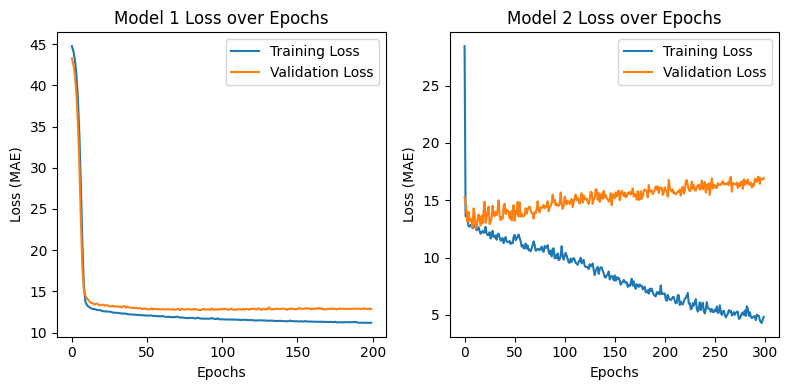

In [34]:
# Створення сітки графіків з одним рядком та двома колонками
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Для першої моделі
axs[0].plot(history_1.history['loss'], label='Training Loss')
axs[0].plot(history_1.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model 1 Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss (MAE)')
axs[0].legend()

# Для другої моделі
axs[1].plot(history_2.history['loss'], label='Training Loss')
axs[1].plot(history_2.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model 2 Loss over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss (MAE)')
axs[1].legend()

plt.tight_layout()
plt.show()